
# Best Applicant Rank

Actually, company is tool which helps to companies find applicants to many jobs in any area. besides it compites with other companies like bumeran, computrabajo, etc.
In this case we are using applications and job posting datasets to understand the behavior of the data and try to apply some algorithms to predict some patterns that we could find.

## Load our data

In [1376]:
import pandas as pd

In [1377]:
ds_applications = './data/dfapplications.csv'
train_data_applicant = pd.read_csv(ds_applications, sep = '|', error_bad_lines=False, warn_bad_lines=True)

b'Skipping line 17234: expected 47 fields, saw 60\nSkipping line 32595: expected 47 fields, saw 60\n'
b'Skipping line 274957: expected 47 fields, saw 60\nSkipping line 275930: expected 47 fields, saw 60\n'
b'Skipping line 280065: expected 47 fields, saw 60\n'


## Data Cleanning

In [1378]:
import re
aux_data_applicant = train_data_applicant

In [1379]:
train_data_applicant.columns

Index(['postulacion_es_descartado', 'postulacion_fecha',
       'postulacion_es_nuevo', 'postulacion_origen', 'postulacion_es_invitado',
       'postulacion_fecha_invitacion', 'postulacion_es_referenciado',
       'postulacion_nombre_categoria', 'postulacion_aviso_mensaje_leido',
       'postulacion_aviso_mensaje_no_leidos',
       'postulacion_aviso_mensaje_por_responder',
       'postulacion_aviso_mensaje_respondidos', 'postulacion_match',
       'postulante_identificador', 'postulante_es_perfil_destacado',
       'postulante_direccion', 'postulante_direccion_ubigeo',
       'postulante_discapacidad', 'postulante_pais_nacionalidad',
       'postulante_pais_residencia', 'postulante_edad',
       'postulante_estado_civil', 'postulante_sexo',
       'postulante_disponibilidad_mudarse',
       'postulante_disponibilidad_a_viajar',
       'postulante_recibir_noti_avisos_empleo',
       'postulante_recibir_noti_info_mercado_laboral',
       'postulante_longitud_presentacion', 'postulante_p

In [1380]:
# Applications
aux_data_applicant.drop('postulacion_es_nuevo', axis=1, inplace=True)
aux_data_applicant.drop('postulacion_origen', axis=1, inplace=True)
aux_data_applicant.drop('postulacion_fecha_invitacion', axis=1, inplace=True)
aux_data_applicant.drop('postulacion_aviso_mensaje_no_leidos', axis=1, inplace=True)
aux_data_applicant.drop('postulacion_aviso_mensaje_leido', axis=1, inplace=True)
aux_data_applicant.drop('postulacion_aviso_mensaje_por_responder', axis=1, inplace=True)
aux_data_applicant.drop('postulacion_aviso_mensaje_respondidos', axis=1, inplace=True)
# Applicants
aux_data_applicant.drop('postulante_es_perfil_destacado', axis=1, inplace=True)
aux_data_applicant.drop('postulante_identificador', axis=1, inplace=True)
aux_data_applicant.drop('postulante_pais_nacionalidad', axis=1, inplace=True)
aux_data_applicant.drop('postulante_recibir_noti_avisos_empleo', axis=1, inplace=True)
aux_data_applicant.drop('postulante_recibir_noti_info_mercado_laboral', axis=1, inplace=True)
aux_data_applicant.drop('postulante_longitud_presentacion', axis=1, inplace=True)
aux_data_applicant.drop('postulante_tiene_fb', axis=1, inplace=True)
aux_data_applicant.drop('postulante_tiene_tw', axis=1, inplace=True)
aux_data_applicant.drop('postulante_tiene_experiencia', axis=1, inplace=True)

# in this case we are deleting this columns because, online evalutaions have not deplyoed yet in Production
# but in the future this will be stronger variables.
aux_data_applicant.drop('evaluacion_postulante_comunicacion', axis=1, inplace=True)
aux_data_applicant.drop('evaluacion_postulante_confiabilidad', axis=1, inplace=True)
aux_data_applicant.drop('evaluacion_postulante_psicolaborales', axis=1, inplace=True)
aux_data_applicant.drop('evaluacion_postulante_ingles', axis=1, inplace=True)

# Jobs
aux_data_applicant.drop('empleo_cantidad_invitaciones', axis=1, inplace=True)
aux_data_applicant.drop('empleo_en_portada', axis=1, inplace=True)

## Feature Engenieering

 In this case we did a crin Script in python but is not deployed in production beacuse actually there are many porjects with 
 hight priority. but here is the Group the Commerce Script where we define a logical ponderation with a psicologist
 

 https://bitbucket.org/orbisunt/aptitus-microservice-jobs/

In [1382]:
### Match Porcentual
import random
from decimal import Decimal

r1 = r"(finalista|seleccionado|terna)"
r2 = r"(?=.*(finalista|seleccionado|terna))(?=.*(sin|no|pre))"

match_percent_category = lambda p: round(random.uniform(60,100), 1) if re.search(
    r1, p['postulacion_nombre_categoria'], re.I) and not re.search(
    r2, p['postulacion_nombre_categoria'], re.I) else  round(random.uniform(10, 75), 1)

In [1383]:
aux_data_applicant['flg_percent_match'] = aux_data_applicant.apply(match_percent_category, axis= 1)

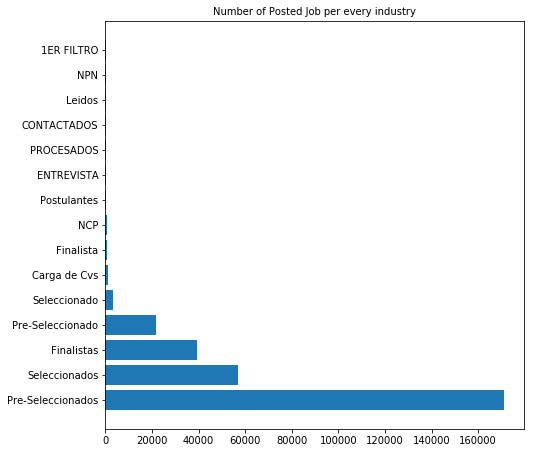

In [1222]:
# (train_data_applicant.groupby('postulacion_nombre_categoria').size()).to_frame('count').sort_values(['count'], ascending=False)
temp = train_data_applicant.groupby('postulacion_nombre_categoria').size().sort_values(ascending=False)
temp = temp.head(15)
df = pd.DataFrame([temp.index,temp],['postulacion_nombre_categoria','total'])
df = df.transpose()

length = len(df)
fig, ax = plt.subplots(
    figsize=(len(df)/2,
             len(df)/2))

pos = np.arange(length)
ax = plt.gca()
#ax.set_yticks([i for i in range(1,len(df)+1)])
ax.barh(
    pos,
    df['total'],
    align='center',
    tick_label=df['postulacion_nombre_categoria'])
ax.set_yticklabels(df['postulacion_nombre_categoria'],fontsize=10)

plt.xticks(fontsize=10)
# plt.tight_layout()
plt.title('Number of Posted Job per every industry',fontsize=10,color='black')
plt.savefig('job applications')
plt.show() 

In [1385]:
### Verificar si ha estado dentro de la etapa finalista
import re

valid_finalist = lambda p: 1 if re.search(
    r"(finalista|seleccionado|terna)", p['postulacion_nombre_categoria'], re.I)and not re.search(
    r"(?=.*(finalista|seleccionado|terna))(?=.*(sin|no|pre))", p['postulacion_nombre_categoria'], re.I) else 0

In [1386]:
aux_data_applicant['flg_finalista'] = aux_data_applicant.apply(valid_finalist, axis=1)

In [1227]:
df_finalista = aux_data_applicant.groupby('flg_finalista').size().reset_index(name='counts')
df_finalista['porcentaje'] = (df_finalista['counts']/df_finalista['counts'].sum())*100
df_finalista

,flg_finalista,counts,porcentaje
0,0,200997,66.64644
1,1,100590,33.35356


# finalistas y ~ finalistas

In [1228]:
#finalistas en funcion de la edad 

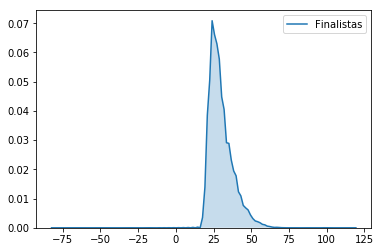

In [1229]:
p1 = sns.kdeplot(aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 1, 'postulante_edad'].dropna(),
                 shade= True,
                 legend = True,
                 label = 'Finalistas')


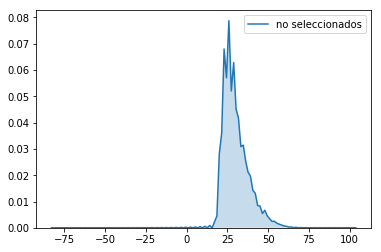

In [1178]:
p2 = sns.kdeplot(aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 0, 'postulante_edad'].dropna(),
                 shade= True,
                 legend = True,
                 label = 'no seleccionados')

C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


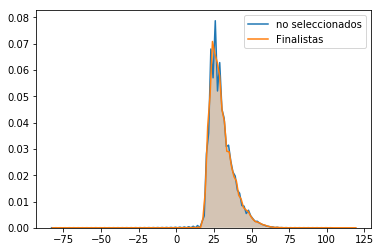

In [1179]:
p2 = sns.kdeplot(aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 0, 'postulante_edad'],
                 shade= True,
                 legend = True,
                 label = 'no seleccionados')
p1 = sns.kdeplot(aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 1, 'postulante_edad'],
                 shade= True,
                 legend = True,
                 label = 'Finalistas')


In [1180]:
aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 0, 'postulante_edad'].mean()

30.127209221096752

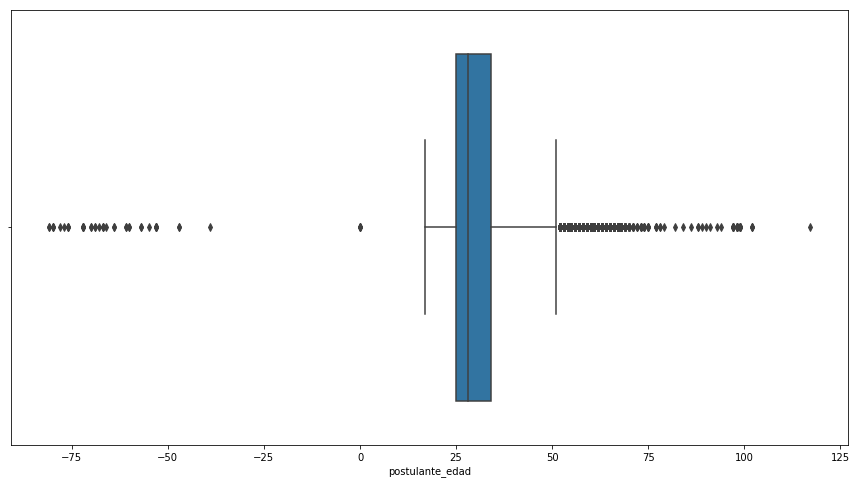

In [1181]:
# Revisemos si tenemos outliers en la variable EDAD
edad = aux_data_applicant.postulante_edad.dropna()
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.boxplot(edad, orient = 'h', whis = 1.9)

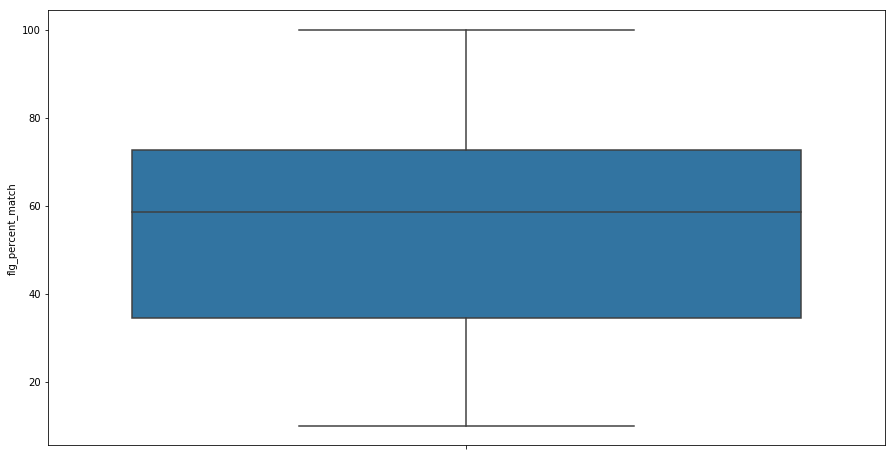

In [1049]:
# Revisemos si tenemos outliers en la variable MATCH
flg_percent_match = aux_data_applicant.flg_percent_match.dropna()
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.boxplot(flg_percent_match, orient = 'v', whis = 1.9)

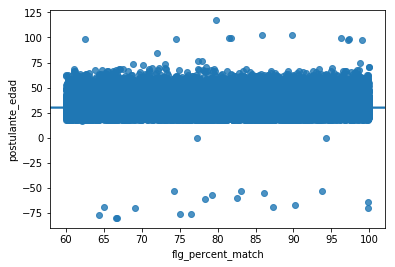

In [1050]:
sns.regplot(x = 'flg_percent_match',
            y='postulante_edad',
            data= aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 1])


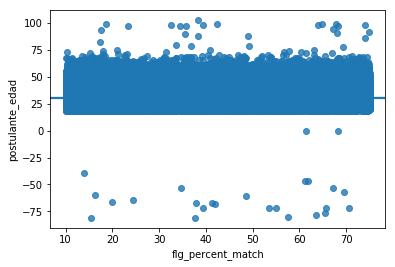

In [1051]:
sns.regplot(x = 'flg_percent_match',
            y='postulante_edad',
            data= aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 0])


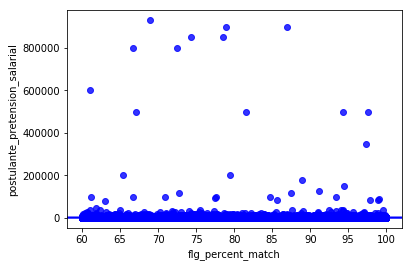

In [1052]:
sns.regplot(x='flg_percent_match',
            y='postulante_pretension_salarial',
            color = 'blue',
            data= aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 1])


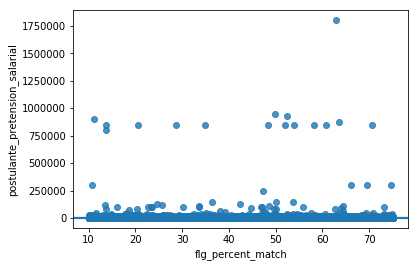

In [1053]:
sns.regplot(x='flg_percent_match',
            y='postulante_pretension_salarial',
            data= aux_data_applicant.loc[aux_data_applicant['flg_finalista'] == 0])


we could see that we have to clean postulants with fake data

## Check it out if we could use a text Minning models

In [1054]:
presentacion = train_data_applicant['postulante_presentacion'].loc[train_data_applicant['postulacion_nombre_categoria'] == 'Finalistas']

In [1055]:
presentacion[7]

'Persona altamente proactiva con estudios de Secretariado Ejecutivo, computación y manejo de Software aplicados al diseño de trabajos administrativos en general, con capacidad de trabajo bajo presión, trabajo en equipo, adecuada para los diferentes cambios dentro de una organización.'

In [1056]:
train_data_applicant.head(10)
presentacion = train_data_applicant['postulante_presentacion'].loc[train_data_applicant['postulacion_nombre_categoria'] == 'DESCARTADOS']

In [1057]:
presentacion[22309]

'Egresada de la carrera de Administración Hotelera en CENFOTUR, luego de tres años y medio de estudios. Gracias a esto, he logrado obtener una experiencia de 12 años trabajando en las más importantes cadenas hoteleras del país desarrollando todos mis conocimientos.'

# Understanding our Data

In [1388]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1389]:
size_category =(train_data_applicant.groupby('empleo_area_puesto').size()).to_frame('size').sort_values(['size'], ascending=False)

In [1390]:
size_category.transpose()

empleo_area_puesto,Comercial / Ventas,"Administración, Contabilidad y Finanzas",Atención al Cliente,Call center / Telemarketing,Almacén / Logística / Transporte,Producción / Operaciones,Marketing / Publicidad / Comunicación,Recursos Humanos,"Tecnología, Sistemas y Telecomunicaciones",Educación,...,Legal,Medicina / Salud,Aduanas y Comercio Exterior,Ingeniería,Construcción / Obra,Diseño / Artes gráficas,Gerencia / Dirección,"Minería, Petróleo y Gas",Investigación y Calidad,Relaciones institucionales / públicas
size,43643,40469,40282,28162,20299,20276,13529,12690,9997,9060,...,4088,3667,3266,2450,2244,1759,1268,988,933,353


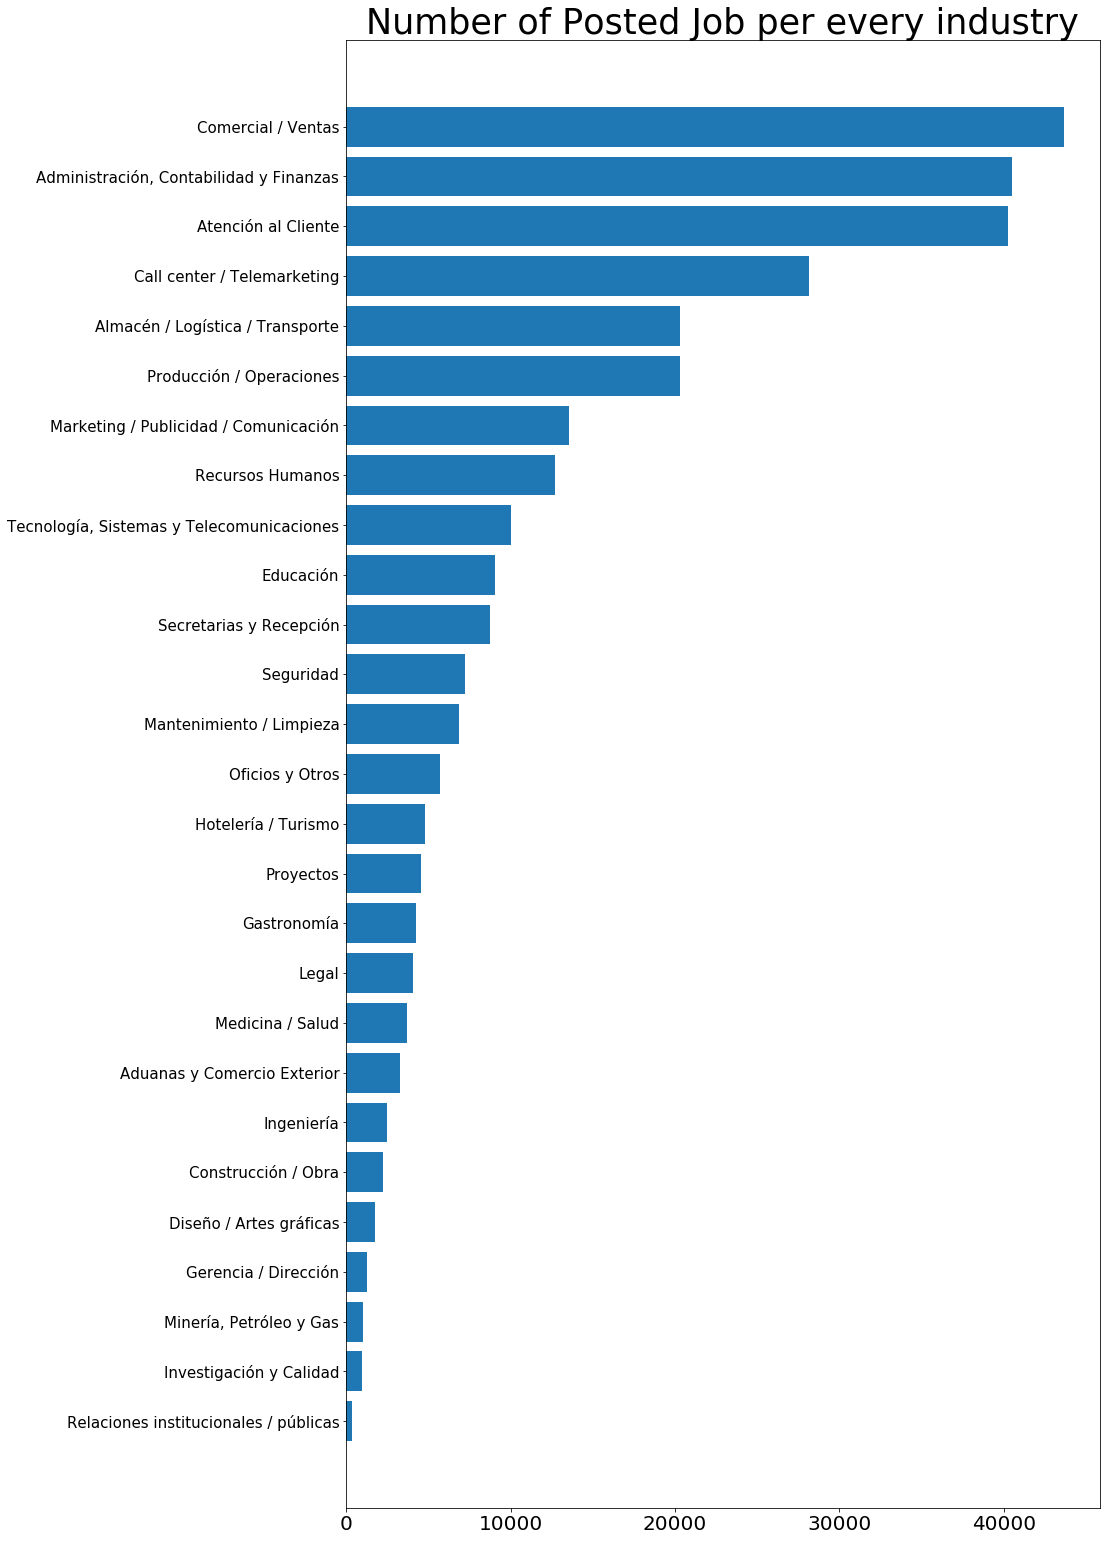

In [478]:
temp = train_data_applicant.groupby('empleo_area_puesto').size().sort_values(ascending=True)
df = pd.DataFrame([temp.index,temp],['empleo_area_puesto','total'])
df = df.transpose()

fig, ax = plt.subplots(figsize=(len(df)/2,len(df)))
pos = np.arange(length)
ax = plt.gca()

#ax.set_yticks([i for i in range(1,len(df)+1)])
ax.barh(pos, df['total'], align='center', tick_label=df['empleo_area_puesto'])
ax.set_yticklabels(df['empleo_area_puesto'],fontsize=15)

plt.xticks(fontsize=20)
#plt.tight_layout()
plt.title('Number of Posted Job per every industry',fontsize=35,color='black')
plt.savefig('job applications')
plt.show()


In [476]:
pd.DataFrame(plot)

,empleo_cantidad_postulantes
empleo_area_puesto,
"Administración, Contabilidad y Finanzas",18311999
Secretarias y Recepción,17665920
Atención al Cliente,13811016
Comercial / Ventas,6792609
Marketing / Publicidad / Comunicación,6475467
Producción / Operaciones,4936661


C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


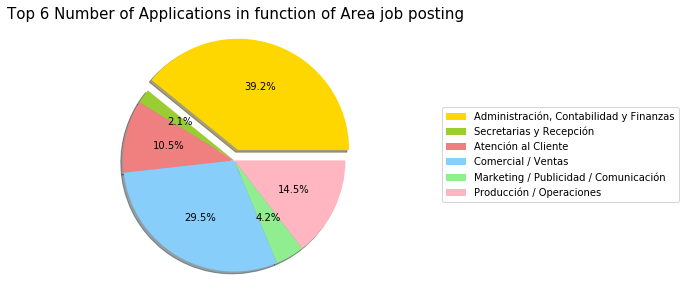

In [453]:
category_tendency = tendency.groupby(['empleo_area_puesto'])['empleo_cantidad_postulantes'].sum()
plot_tendency = category_tendency.sort_values(ascending=False)
plot = plot_tendency.head(6)
plot.index

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen','lightpink']
explode = (0.1, 0, 0, 0, 0, 0) 

w , patches , text = plt.pie(
    x=category_tendency.head(6).values,
    explode = explode,
    colors=colors, 
    autopct='%1.1f%%',
    shadow= True,
    startangle= 0)

plt.tight_layout()
plt.legend(patches,labels = plot.index,
           loc=6,
           bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.title('Top 6 Number of Applications in function of Area Job posting',
          fontsize=15,
          color='black')
plt.savefig('pie')
plt.show()

![Sklearn!](imgs/Background20Screening11.jpg "Scikit-learn")

,empleo_nivel_puesto,postulante_pretension_salarial
0,Analista / Asistente,1867.794954
1,Ejecutivo Comercial,1734.935660
2,Gerencia,7601.584112
3,Jefe / Supervisor,3806.915799
4,Otros,1727.684762
5,Practicante,1043.780424
6,Trainee,1090.962359
7,Técnicos / Operativos,1402.963500
8,Vendedor,1456.585657


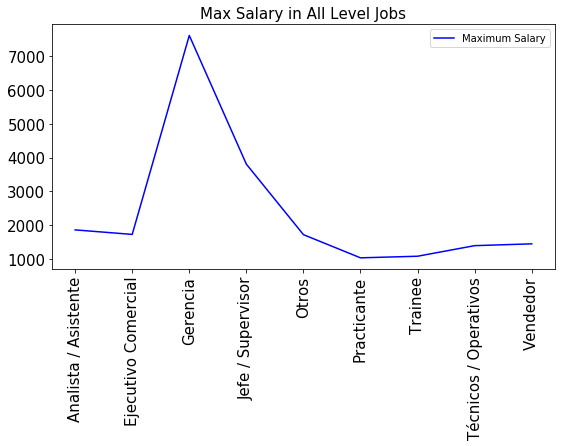

In [543]:
inPretention = train_data_applicant.groupby(['empleo_nivel_puesto'])['postulante_pretension_salarial'].mean()
# train_data_applicant.loc[:, 'postulacion_aviso_mensaje_no_leidos
salary_pretention = inPretention.reset_index()

length = len(salary_pretention)

fig, ax = plt.subplots(figsize = (length, length/2))
xmarks = [i for i in range(1, length+1)]
plt.xticks(xmarks)
plt.plot(xmarks,
         salary_pretention['postulante_pretension_salarial'],
         c='blue',
         label='Maximum Salary')
ax.set_xticklabels(salary_pretention.empleo_nivel_puesto,
                   rotation=90)
plt.legend(loc='upper right',
           fontsize=10,
           frameon=True)
plt.title("Max Salary in All Level Jobs",
          fontsize=15)
ax.tick_params(labelsize=15)
plt.show()


In [606]:
salary_pretention.sort_values

<bound method DataFrame.sort_values of      empleo_nivel_puesto  postulante_pretension_salarial
0   Analista / Asistente                     1867.794954
1    Ejecutivo Comercial                     1734.935660
2               Gerencia                     7601.584112
3      Jefe / Supervisor                     3806.915799
4                  Otros                     1727.684762
5            Practicante                     1043.780424
6                Trainee                     1090.962359
7  Técnicos / Operativos                     1402.963500
8               Vendedor                     1456.585657>

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


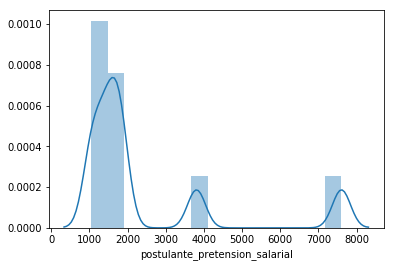

In [544]:
sns.distplot(salary_pretention.postulante_pretension_salarial)

# Inputation and Fill NaN Values

In [1391]:
aux_data_applicant2 = aux_data_applicant

In [1392]:
# we gonna show % of missing per variable
aux_data_applicant2.isnull().sum() / len(aux_data_applicant)

postulacion_es_descartado                 0.000000
postulacion_fecha                         0.000000
postulacion_es_invitado                   0.000000
postulacion_es_referenciado               0.000000
postulacion_nombre_categoria              0.000000
postulacion_match                         0.000000
postulante_direccion                      0.354166
postulante_direccion_ubigeo               0.001903
postulante_discapacidad                   0.046948
postulante_pais_residencia                0.000027
postulante_edad                           0.003611
postulante_estado_civil                   0.017365
postulante_sexo                           0.000096
postulante_disponibilidad_mudarse         0.000000
postulante_disponibilidad_a_viajar        0.000000
postulante_presentacion                   0.368637
postulante_ultima_actualizacion_perfil    0.000003
postulante_pretension_salarial            0.387142
empleo_nombre_puesto                      0.000000
empleo_area_puesto             

In [1393]:
aux_data_applicant2.shape

(301587, 27)

In [1394]:
# Eliminemos filas donde la EDAD es missing
#df_train_clientes_aux[df_train_clientes_aux.EDAD.notnull()].shape

In [1395]:
round(aux_data_applicant2.postulante_edad.mean())

30

In [1396]:
# Completar los valores perdidos de la EDAD por promedio, mediana y moda
aux_data_applicant2.postulante_edad.fillna(
    round(aux_data_applicant2.postulante_edad.mean()), inplace = True)

In [1397]:
# number of missing values postulante_edad
sum(train_data_applicant['postulante_edad'].isnull())

0

In [1398]:
##  Discapacidad
sum(aux_data_applicant2.postulante_discapacidad.isnull())


14159

In [1399]:
# Rellenar los valores perdidos de discpacidad
aux_data_applicant2.postulante_discapacidad.fillna(
    0,
    inplace = True)  

In [1400]:
sum(aux_data_applicant2.postulante_discapacidad.isnull())

0

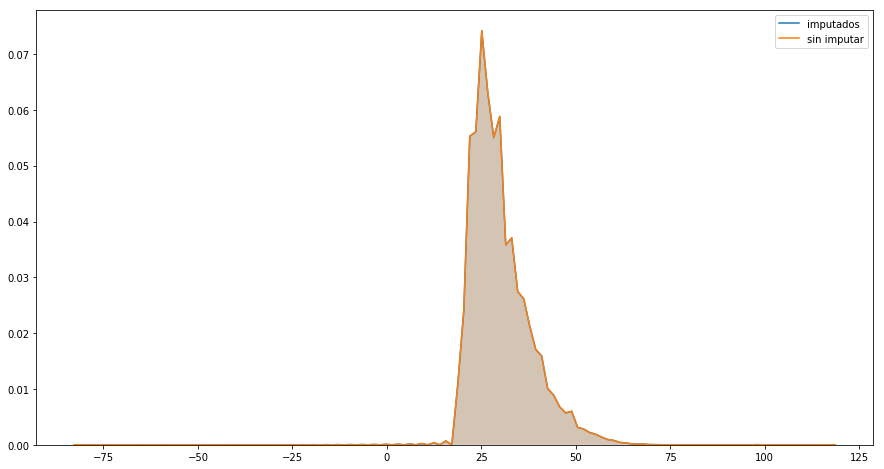

In [1237]:
# Veamos como es la distribución de la variable EDAD con la imputación
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.kdeplot(aux_data_applicant2.postulante_edad.fillna(
    aux_data_applicant.postulante_edad.median()),
            shade=True,
            legend=True,
            label = 'imputados')
sns.kdeplot(train_data_applicant.postulante_edad.dropna(), 
            shade=True,
            legend=True,
            label = 'sin imputar')

In [1401]:
# Salary Pretention MEAN()
round(aux_data_applicant2.postulante_pretension_salarial.mean())

1915

In [1402]:
sum(aux_data_applicant2.postulante_pretension_salarial.isnull())

116757

In [1403]:
# Completar los valores perdidos de la Pretension salarial por promedio
aux_data_applicant2.postulante_pretension_salarial.fillna(
    round(aux_data_applicant2.postulante_pretension_salarial.mean()), inplace= True)

In [1404]:
# number of missing values postulante_edad
sum(aux_data_applicant2['postulante_pretension_salarial'].isnull())

0

In [1405]:
# Jobs that dont have applicants
len(aux_data_applicant2.loc[aux_data_applicant2['empleo_cantidad_postulantes'] == 0])

63

In [1406]:
aux_data_applicant2.drop(aux_data_applicant2[aux_data_applicant2.empleo_cantidad_postulantes == 0].index, inplace=True)

In [1407]:
### Probability to be choosen
prob_total_postulant = lambda p: round((1/(p['empleo_cantidad_postulantes']/7)),2) if p['flg_finalista'] == 1 else round((1/(p['empleo_cantidad_postulantes']/3)),2)

In [1408]:
aux_data_applicant2['flg_prob_chosen'] = aux_data_applicant2.apply(prob_total_postulant, axis= 1)

In [1409]:
aux_data_applicant2.isnull().sum() / len(aux_data_applicant2)

postulacion_es_descartado                 0.000000
postulacion_fecha                         0.000000
postulacion_es_invitado                   0.000000
postulacion_es_referenciado               0.000000
postulacion_nombre_categoria              0.000000
postulacion_match                         0.000000
postulante_direccion                      0.354191
postulante_direccion_ubigeo               0.001904
postulante_discapacidad                   0.000000
postulante_pais_residencia                0.000027
postulante_edad                           0.000000
postulante_estado_civil                   0.017362
postulante_sexo                           0.000096
postulante_disponibilidad_mudarse         0.000000
postulante_disponibilidad_a_viajar        0.000000
postulante_presentacion                   0.368607
postulante_ultima_actualizacion_perfil    0.000003
postulante_pretension_salarial            0.000000
empleo_nombre_puesto                      0.000000
empleo_area_puesto             

# Implementar el Modelo

In [1410]:
# Seleccionamos las variables con las que vamos a modelar
aux_data_applicant2.head(1)

,postulacion_es_descartado,postulacion_fecha,postulacion_es_invitado,postulacion_es_referenciado,postulacion_nombre_categoria,postulacion_match,postulante_direccion,postulante_direccion_ubigeo,postulante_discapacidad,postulante_pais_residencia,...,empleo_nombre_puesto,empleo_area_puesto,empleo_nivel_puesto,empleo_cantidad_postulantes,empleo_tipo_puesto,empleo_modalidad_de_contrato,empresa_nombre,flg_percent_match,flg_finalista,flg_prob_chosen
0,0,2017-09-02 00:34:02,0,0,Pre-Seleccionados,13.52,NaN,"Lince, Lima",0.0,Perú,...,Anfitrión SURCO - Exclusivo Casino,Atención al Cliente,Técnicos / Operativos,74,webpremium,1,Consumo Masivo,65.3,0,0.04


In [1411]:
columns_exec = list(aux_data_applicant2.select_dtypes(include='object').columns)
columns_exec

['postulacion_fecha',
 'postulacion_nombre_categoria',
 'postulante_direccion',
 'postulante_direccion_ubigeo',
 'postulante_pais_residencia',
 'postulante_estado_civil',
 'postulante_sexo',
 'postulante_presentacion',
 'postulante_ultima_actualizacion_perfil',
 'empleo_nombre_puesto',
 'empleo_area_puesto',
 'empleo_nivel_puesto',
 'empleo_tipo_puesto',
 'empresa_nombre']

In [1414]:
# Variables type object WE wont use
aux_data_applicant2.drop('postulante_estado_civil', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_sexo', axis=1, inplace=True)
aux_data_applicant2.drop('empleo_area_puesto', axis=1, inplace=True)
aux_data_applicant2.drop('empleo_nivel_puesto', axis=1, inplace=True)
aux_data_applicant2.drop('empleo_tipo_puesto', axis=1, inplace=True)
aux_data_applicant2.drop('empresa_nombre', axis=1, inplace=True)

# Others that we wont use
aux_data_applicant2.drop('postulacion_fecha', axis=1, inplace=True)
aux_data_applicant2.drop('postulacion_nombre_categoria', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_direccion', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_direccion_ubigeo', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_pais_residencia', axis=1, inplace=True)
aux_data_applicant2.drop('empleo_modalidad_de_contrato', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_presentacion', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_ultima_actualizacion_perfil', axis=1, inplace=True)
aux_data_applicant2.drop('empleo_nombre_puesto', axis=1, inplace=True)


aux_data_applicant2.drop('empleo_cantidad_postulantes', axis=1, inplace=True)
aux_data_applicant2.drop('postulacion_match', axis=1, inplace=True)
aux_data_applicant2.drop('postulacion_es_descartado', axis=1, inplace=True)
aux_data_applicant2.drop('postulacion_es_invitado', axis=1, inplace=True)
aux_data_applicant2.drop('postulacion_es_referenciado', axis=1, inplace=True)

aux_data_applicant2.drop('postulante_disponibilidad_mudarse', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_disponibilidad_a_viajar', axis=1, inplace=True)
aux_data_applicant2.drop('postulante_discapacidad', axis=1, inplace=True)

In [1415]:
aux_data_applicant2.head(2)

,postulante_edad,postulante_pretension_salarial,flg_percent_match,flg_finalista,flg_prob_chosen
0,40.0,1915.0,65.3,0,0.04
1,40.0,1915.0,64.2,1,0.08


In [1416]:
aux_data_applicant2.isnull().sum() / len(aux_data_applicant2)

postulante_edad                   0.0
postulante_pretension_salarial    0.0
flg_percent_match                 0.0
flg_finalista                     0.0
flg_prob_chosen                   0.0
dtype: float64

In [1417]:
# we are going to delete person who have negative value and higher than 85
len(aux_data_applicant2.loc[(aux_data_applicant2.postulante_edad < 15) | (aux_data_applicant2.postulante_edad > 85)])

77

In [1418]:
aux_data_applicant2.drop(aux_data_applicant2.loc[(aux_data_applicant2.postulante_edad < 15) | (aux_data_applicant2.postulante_edad > 85)].index, inplace=True)

In [1419]:
# we are going to delete fake salary pretention
len(aux_data_applicant2.loc[(aux_data_applicant2.postulante_pretension_salarial > 30000)])

130

In [1420]:
aux_data_applicant2.drop(
    aux_data_applicant2.loc[(aux_data_applicant2.postulante_pretension_salarial > 30000)].index,
    inplace=True)

In [1421]:
df_final_vars = aux_data_applicant2.columns.values.tolist()
df_final_vars

['postulante_edad',
 'postulante_pretension_salarial',
 'flg_percent_match',
 'flg_finalista',
 'flg_prob_chosen']

In [1422]:
y = ['flg_finalista']

In [1423]:
X = [i for i in df_final_vars if i not in y]

In [1424]:
X

['postulante_edad',
 'postulante_pretension_salarial',
 'flg_percent_match',
 'flg_prob_chosen']

# Selección de variables con REF (Recursive Feature Elimination)

In [1425]:
# Utilizamos las 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1426]:
aux_data_applicant2.head(1)

,postulante_edad,postulante_pretension_salarial,flg_percent_match,flg_finalista,flg_prob_chosen
0,40.0,1915.0,65.3,0,0.04


In [1427]:
aux_data_applicant2.isnull().sum() / len(aux_data_applicant2)

postulante_edad                   0.0
postulante_pretension_salarial    0.0
flg_percent_match                 0.0
flg_finalista                     0.0
flg_prob_chosen                   0.0
dtype: float64

In [1429]:
rfe = RFE(logreg, 2) # aplicamos la regresión logística como estimador y pedimos las 3 mejores variables

In [1430]:
rfe = rfe.fit(aux_data_applicant2[X], aux_data_applicant2[y])

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1431]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True]
[2 3 1 1]


In [1432]:
X = aux_data_applicant2.iloc[:,rfe.support_] 
y = aux_data_applicant2['flg_finalista']

In [1433]:
X

,flg_percent_match,flg_finalista
0,65.3,0
1,64.2,1
2,62.3,0
3,52.2,0
4,33.0,0
5,74.9,0
6,47.9,0
7,88.0,1
8,88.7,1
9,67.5,1


In [1434]:
y

0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         1
8         1
9         1
10        1
11        0
12        0
13        1
14        1
15        0
16        0
17        1
18        1
19        1
20        0
21        0
22        0
23        0
24        0
25        1
26        1
27        1
28        0
29        0
         ..
301557    0
301558    0
301559    1
301560    1
301561    0
301562    0
301563    0
301564    1
301565    0
301566    0
301567    0
301568    0
301569    0
301570    0
301571    0
301572    0
301573    0
301574    1
301575    0
301576    0
301577    0
301578    0
301579    0
301580    0
301581    0
301582    0
301583    0
301584    0
301585    0
301586    1
Name: flg_finalista, Length: 301317, dtype: int64

### Implementamos el modelo

In [1435]:
!pip install statsmodels
!pip install patsy

In [1436]:
import statsmodels.api as sm

In [1437]:
logit_model = sm.Logit(y,X)

In [1438]:
result = logit_model.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [1439]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          flg_finalista   No. Observations:               301317
Model:                          Logit   Df Residuals:                   301315
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Sep 2018   Pseudo R-squ.:                   1.000
Time:                        01:35:26   Log-Likelihood:            -0.00057516
converged:                      False   LL-Null:                   -1.9182e+05
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
flg_percent_match    -1.5182      4.103     -0.370      0.711      -9.561       6.524
flg_finalista       169.0502    429.082      0.394      0.694    -671.935    1010.035

Complete Separation: Th

### Ajuste del modelo

In [1440]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1442]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1443]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [1444]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[60290     0]
 [    0 30106]]


## Curva ROC

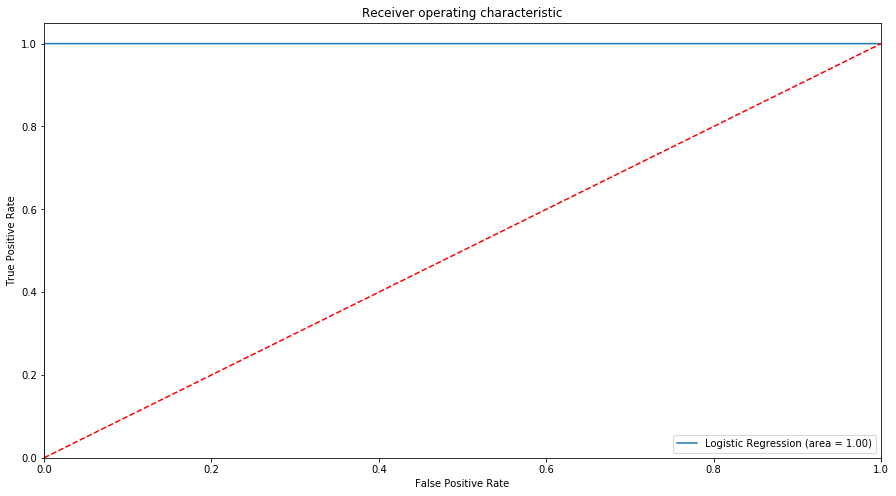

In [1445]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
#plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

![Sklearn!](400x400_avatar/images.png "Scikit-learn")
